<a href="https://colab.research.google.com/github/eunseojeon/AI_Coding_for_Autonomous_Driving_Class/blob/main/0708(1)_OpenCV_Canny%EA%B8%B0%EB%B0%98_%EC%8B%A0%ED%98%B8%EB%93%B1_%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ❓ 수정 안 한 원래 코드

=== Google Colab 신호등 인식 테스트 ===
1. upload_and_detect() - 기본 검출
2. adjust_parameters_and_test() - 파라미터 비교 테스트

사용법:
upload_and_detect()  # 이 함수를 실행하세요
이미지 파일을 선택해주세요...


Saving 신호등.png to 신호등.png

처리중: 신호등.png


/tmp/ipython-input-1-3967067028.py:117: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-3967067028.py:117: UserWarning: Glyph 4469 (\N{HANGUL JUNGSEONG I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-3967067028.py:117: UserWarning: Glyph 4523 (\N{HANGUL JONGSEONG NIEUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-3967067028.py:117: UserWarning: Glyph 4370 (\N{HANGUL CHOSEONG HIEUH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-3967067028.py:117: UserWarning: Glyph 4457 (\N{HANGUL JUNGSEONG O}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-3967067028.py:117: UserWarning: Glyph 4355 (\N{HANGUL CHOSEONG TIKEUT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-3967067028.py:117: UserWarning: Glyph 4467 (\N{HANGUL JUNGSEONG EU}) missing from font(s) DejaVu Sans.

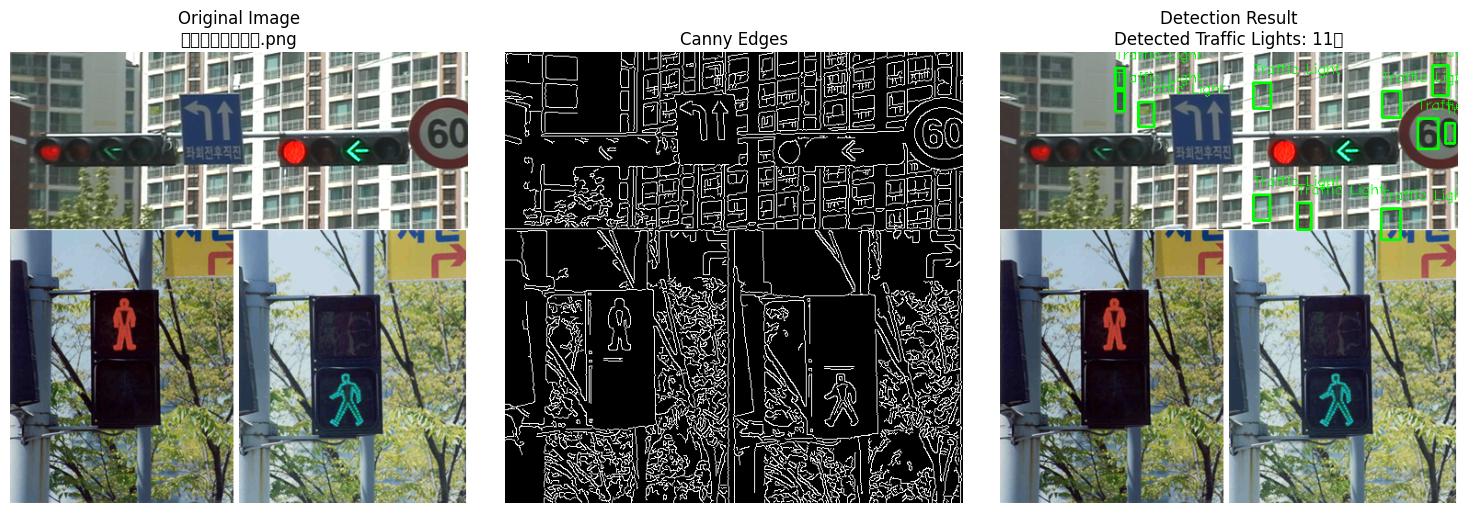

검출된 신호등 개수: 11
  신호등 1: 위치=(414, 170), 크기=(21x34)
  신호등 2: 위치=(323, 164), 크기=(15x29)
  신호등 3: 위치=(275, 155), 크기=(18x28)
  신호등 4: 위치=(484, 77), 크기=(10x22)
  신호등 5: 위치=(454, 72), 크기=(22x33)
  신호등 6: 위치=(150, 54), 크기=(17x27)
  신호등 7: 위치=(415, 42), 크기=(20x29)
  신호등 8: 위치=(125, 42), 크기=(10x22)
  신호등 9: 위치=(275, 33), 크기=(19x28)
  신호등 10: 위치=(125, 17), 크기=(10x22)
  신호등 11: 위치=(470, 14), 크기=(17x33)


In [1]:
# 1.결과 잡다한 신호등 인식 윗쪽 40퍼센트 정도만 감지 Google Colab에서 이미지 업로드하여 신호등 인식하기
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

def detect_traffic_light_canny(image):
    """
    Canny 엣지 검출만을 사용한 신호등 인식
    """
    # 그레이스케일 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 가우시안 블러로 노이즈 제거
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Canny 엣지 검출
    edges = cv2.Canny(blurred, 50, 150)

    # 컨투어 찾기
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    traffic_lights = []

    for contour in contours:
        # 컨투어 면적 필터링 (너무 작거나 큰 것 제외)
        area = cv2.contourArea(contour)
        if area < 100 or area > 5000:
            continue

        # 컨투어를 둘러싸는 사각형
        x, y, w, h = cv2.boundingRect(contour)

        # 종횡비 체크 (신호등은 대략 세로로 긴 형태)
        aspect_ratio = float(w) / h
        if aspect_ratio > 0.8:  # 너무 가로로 긴 것 제외
            continue

        # 컨투어의 둘레와 면적으로 원형성 체크
        perimeter = cv2.arcLength(contour, True)
        if perimeter == 0:
            continue

        circularity = 4 * np.pi * area / (perimeter * perimeter)

        # 원형에 가까운 것들만 선택 (신호등의 각 등은 원형)
        if circularity > 0.3:  # 임계값 조정 가능
            traffic_lights.append((x, y, w, h))

    return traffic_lights, edges

def draw_detections(image, detections):
    """
    검출된 신호등 영역을 이미지에 그리기
    """
    result = image.copy()
    for (x, y, w, h) in detections:
        cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(result, 'Traffic Light', (x, y-10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    return result

def upload_and_detect():
    """
    Colab에서 이미지 업로드하고 신호등 검출
    """
    print("이미지 파일을 선택해주세요...")
    uploaded = files.upload()

    for filename in uploaded.keys():
        print(f"\n처리중: {filename}")

        # 업로드된 이미지 읽기
        image_data = uploaded[filename]
        image = Image.open(io.BytesIO(image_data))

        # PIL Image를 OpenCV 형식으로 변환
        image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

        # 이미지 크기 조정 (너무 크면 처리 시간이 오래 걸림)
        height, width = image_cv.shape[:2]
        if width > 800:
            ratio = 800 / width
            new_width = 800
            new_height = int(height * ratio)
            image_cv = cv2.resize(image_cv, (new_width, new_height))

        # 신호등 검출
        detections, edges = detect_traffic_light_canny(image_cv)

        # 결과 이미지 생성
        result_image = draw_detections(image_cv, detections)

        # 결과 시각화 (matplotlib 사용)
        plt.figure(figsize=(15, 5))

        # 원본 이미지
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
        plt.title(f'Original Image\n{filename}')
        plt.axis('off')

        # Canny 엣지
        plt.subplot(1, 3, 2)
        plt.imshow(edges, cmap='gray')
        plt.title('Canny Edges')
        plt.axis('off')

        # 검출 결과
        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Detection Result\nDetected Traffic Lights: {len(detections)}개')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        # 검출 정보 출력
        print(f"검출된 신호등 개수: {len(detections)}")
        for i, (x, y, w, h) in enumerate(detections):
            print(f"  신호등 {i+1}: 위치=({x}, {y}), 크기=({w}x{h})")

def adjust_parameters_and_test():
    """
    파라미터를 조정하면서 테스트할 수 있는 함수
    """
    print("이미지 파일을 선택해주세요...")
    uploaded = files.upload()

    # 첫 번째 업로드된 이미지만 사용
    filename = list(uploaded.keys())[0]
    image_data = uploaded[filename]
    image = Image.open(io.BytesIO(image_data))
    image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    # 이미지 크기 조정
    height, width = image_cv.shape[:2]
    if width > 800:
        ratio = 800 / width
        new_width = 800
        new_height = int(height * ratio)
        image_cv = cv2.resize(image_cv, (new_width, new_height))

    # 다양한 파라미터로 테스트
    test_params = [
        {"canny_low": 30, "canny_high": 100, "min_area": 50, "max_area": 3000, "circularity": 0.2},
        {"canny_low": 50, "canny_high": 150, "min_area": 100, "max_area": 5000, "circularity": 0.3},
        {"canny_low": 70, "canny_high": 200, "min_area": 200, "max_area": 8000, "circularity": 0.4}
    ]

    plt.figure(figsize=(20, 12))

    for i, params in enumerate(test_params):
        # 그레이스케일 변환
        gray = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        # Canny 엣지 검출 (파라미터 변경)
        edges = cv2.Canny(blurred, params["canny_low"], params["canny_high"])

        # 컨투어 찾기
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        traffic_lights = []
        for contour in contours:
            area = cv2.contourArea(contour)
            if area < params["min_area"] or area > params["max_area"]:
                continue

            x, y, w, h = cv2.boundingRect(contour)
            aspect_ratio = float(w) / h
            if aspect_ratio > 0.8:
                continue

            perimeter = cv2.arcLength(contour, True)
            if perimeter == 0:
                continue

            circularity = 4 * np.pi * area / (perimeter * perimeter)
            if circularity > params["circularity"]:
                traffic_lights.append((x, y, w, h))

        # 결과 그리기
        result = draw_detections(image_cv, traffic_lights)

        # 시각화
        plt.subplot(3, 3, i*3 + 1)
        plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
        plt.title(f'Original (Test {i+1})')
        plt.axis('off')

        plt.subplot(3, 3, i*3 + 2)
        plt.imshow(edges, cmap='gray')
        plt.title(f'Canny {params["canny_low"]}-{params["canny_high"]}')
        plt.axis('off')

        plt.subplot(3, 3, i*3 + 3)
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.title(f'Result: {len(traffic_lights)}개 검출')
        plt.axis('off')

        print(f"Test {i+1} - 파라미터: {params}")
        print(f"  Detected Traffic Lights: {len(traffic_lights)}\n")

    plt.tight_layout()
    plt.show()

# 실행 함수들
print("=== Google Colab 신호등 인식 테스트 ===")
print("1. upload_and_detect() - 기본 검출")
print("2. adjust_parameters_and_test() - 파라미터 비교 테스트")
print("\n사용법:")
print("upload_and_detect()  # 이 함수를 실행하세요")

# 바로 실행하려면 아래 주석을 해제하세요
upload_and_detect()

---
##✏️아래는 고쳐본 코드

=== Google Colab 신호등 인식 테스트 ===
1. upload_and_detect() - 기본 검출
2. adjust_parameters_and_test() - 파라미터 비교 테스트

사용법:
upload_and_detect()  # 이 함수를 실행하세요
이미지 파일을 선택해주세요...


Saving 신호등.png to 신호등 (3).png

처리중: 신호등 (3).png


/tmp/ipython-input-7-1982380988.py:136: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-1982380988.py:136: UserWarning: Glyph 4469 (\N{HANGUL JUNGSEONG I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-1982380988.py:136: UserWarning: Glyph 4523 (\N{HANGUL JONGSEONG NIEUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-1982380988.py:136: UserWarning: Glyph 4370 (\N{HANGUL CHOSEONG HIEUH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-1982380988.py:136: UserWarning: Glyph 4457 (\N{HANGUL JUNGSEONG O}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-1982380988.py:136: UserWarning: Glyph 4355 (\N{HANGUL CHOSEONG TIKEUT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-1982380988.py:136: UserWarning: Glyph 4467 (\N{HANGUL JUNGSEONG EU}) missing from font(s) DejaVu Sans.

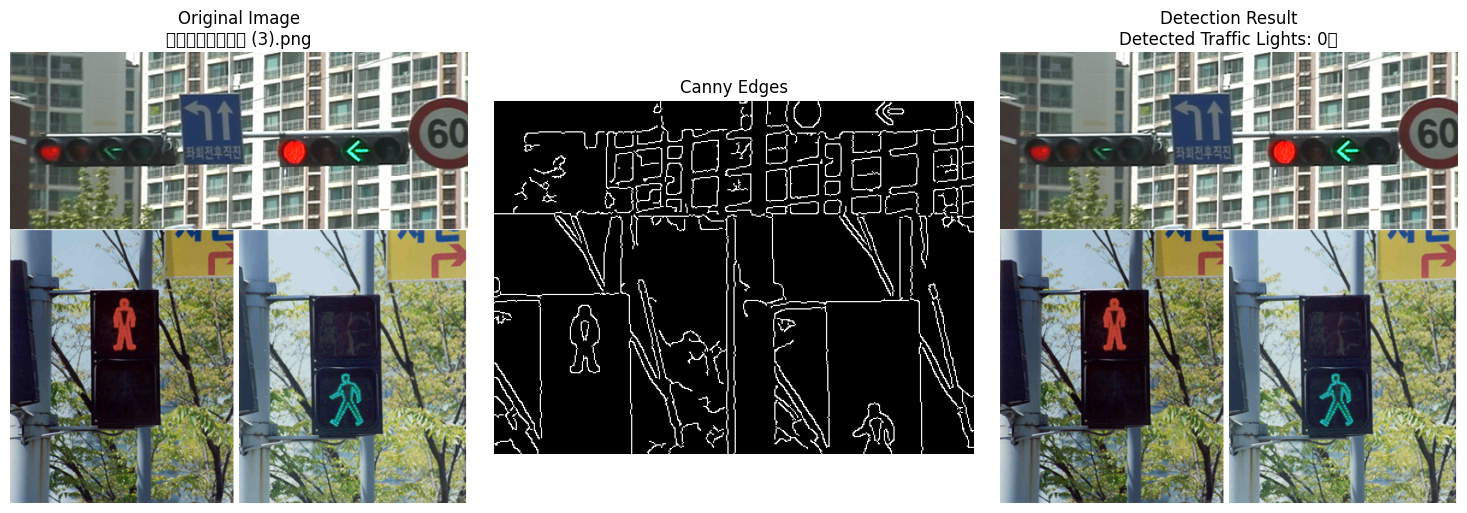

검출된 신호등 개수: 0


In [7]:
# 1.결과 잡다한 신호등 인식 윗쪽 40퍼센트 정도만 감지 Google Colab에서 이미지 업로드하여 신호등 인식하기
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

def detect_traffic_light_canny(image):
    """
    Canny 엣지 검출 + 엄격 파라미터 신호등 인식
    """
    height, width = image.shape[:2]

    # === [수정] ROI: 상하단 20%, 좌우 10% 제외 ===
    roi = image[int(height*0.2):int(height*0.8), int(width*0.1):int(width*0.9)]

    # === [수정] 블러 커널 (5x5 → 9x9) ===
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (9, 9), 0)

    # === [수정] Canny 임계값 (30-120 → 50-150) ===
    edges = cv2.Canny(blurred, 50, 150)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    traffic_lights = []

    # === [수정] HSV 색상 필터: 채도/명도 100 이상으로 상향 ===
    hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, (0, 100, 100), (180, 255, 255))

    for contour in contours:
        # 컨투어 면적 필터링 (너무 작거나 큰 것 제외)
        area = cv2.contourArea(contour)
        # === [수정] 면적 범위 (200-5000) ===
        if area < 200 or area > 5000:
            continue

        # 컨투어를 둘러싸는 사각형
        x, y, w, h = cv2.boundingRect(contour)
        # === [수정] 크기 필터 (20x20~200x200 픽셀) ===
        if w < 20 or h < 20 or w > 200 or h > 200:
            continue

         # === [수정] 종횡비 (0.8 이하 → 0.5~2.0) ===
        aspect_ratio = float(w) / h
        if aspect_ratio < 0.5 or aspect_ratio > 2.0:
            continue

        # 컨투어의 둘레와 면적으로 원형성 체크
        perimeter = cv2.arcLength(contour, True)
        if perimeter == 0:
            continue

        # === [수정] 원형성 (0.15 → 0.3 이상) ===
        circularity = 4 * np.pi * area / (perimeter * perimeter)
        if circularity < 0.3:
            continue

        # === [수정] 밝은 픽셀 비율(밀도 체크): 0.5 미만 제외 ===
        contour_mask = np.zeros_like(mask)
        cv2.drawContours(contour_mask, [contour], -1, 255, -1)
        bright_pixels = cv2.bitwise_and(mask, mask, mask=contour_mask)
        bright_ratio = cv2.countNonZero(bright_pixels) / area
        if bright_ratio < 0.5:
            continue

        # ROI 좌표를 원본 이미지 기준으로 변환
        traffic_lights.append((x + int(width*0.1), y + int(height*0.2), w, h))
    return traffic_lights, edges


def draw_detections(image, detections):
    """
    검출된 신호등 영역을 이미지에 그리기
    """
    result = image.copy()
    for (x, y, w, h) in detections:
        cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(result, 'Traffic Light', (x, y-10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    return result

def upload_and_detect():
    """
    Colab에서 이미지 업로드하고 신호등 검출
    """
    print("이미지 파일을 선택해주세요...")
    uploaded = files.upload()

    for filename in uploaded.keys():
        print(f"\n처리중: {filename}")

        # 업로드된 이미지 읽기
        image_data = uploaded[filename]
        image = Image.open(io.BytesIO(image_data))

        # PIL Image를 OpenCV 형식으로 변환
        image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

        # 이미지 크기 조정 (너무 크면 처리 시간이 오래 걸림)
        height, width = image_cv.shape[:2]
        if width > 800:
            ratio = 800 / width
            new_width = 800
            new_height = int(height * ratio)
            image_cv = cv2.resize(image_cv, (new_width, new_height))

        # 신호등 검출
        detections, edges = detect_traffic_light_canny(image_cv)

        # 결과 이미지 생성
        result_image = draw_detections(image_cv, detections)

        # 결과 시각화 (matplotlib 사용)
        plt.figure(figsize=(15, 5))

        # 원본 이미지
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
        plt.title(f'Original Image\n{filename}')
        plt.axis('off')

        # Canny 엣지
        plt.subplot(1, 3, 2)
        plt.imshow(edges, cmap='gray')
        plt.title('Canny Edges')
        plt.axis('off')

        # 검출 결과
        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Detection Result\nDetected Traffic Lights: {len(detections)}개')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        # 검출 정보 출력
        print(f"검출된 신호등 개수: {len(detections)}")
        for i, (x, y, w, h) in enumerate(detections):
            print(f"  신호등 {i+1}: 위치=({x}, {y}), 크기=({w}x{h})")

def adjust_parameters_and_test():
    """
    파라미터를 조정하면서 테스트할 수 있는 함수
    """
    print("이미지 파일을 선택해주세요...")
    uploaded = files.upload()

    # 첫 번째 업로드된 이미지만 사용
    filename = list(uploaded.keys())[0]
    image_data = uploaded[filename]
    image = Image.open(io.BytesIO(image_data))
    image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    # 이미지 크기 조정
    height, width = image_cv.shape[:2]
    if width > 800:
        ratio = 800 / width
        new_width = 800
        new_height = int(height * ratio)
        image_cv = cv2.resize(image_cv, (new_width, new_height))

    # === [수정] 테스트 파라미터 세트 모두 엄격하게 변경 ===
    test_params = [
        {"canny_low": 50, "canny_high": 150, "min_area": 200, "max_area": 5000, "circularity": 0.3, "aspect_min": 0.5, "aspect_max": 2.0},
        {"canny_low": 60, "canny_high": 160, "min_area": 250, "max_area": 4500, "circularity": 0.35, "aspect_min": 0.6, "aspect_max": 1.8},
        {"canny_low": 70, "canny_high": 170, "min_area": 300, "max_area": 4000, "circularity": 0.4, "aspect_min": 0.7, "aspect_max": 1.5}
    ]

    plt.figure(figsize=(20, 12))

    for i, params in enumerate(test_params):
      # === [수정] ROI, 블러, HSV 마스크, 밝은 픽셀 비율 등 동일하게 적용 ===
        roi = image_cv[int(height*0.2):int(height*0.8), int(width*0.1):int(width*0.9)]
        # 그레이스케일 변환
        gray = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (9, 9), 0)

        # Canny 엣지 검출 (파라미터 변경)
        edges = cv2.Canny(blurred, params["canny_low"], params["canny_high"])

        # 컨투어 찾기
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        traffic_lights = []

        hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, (0, 100, 100), (180, 255, 255))


        for contour in contours:
            area = cv2.contourArea(contour)
            if area < params["min_area"] or area > params["max_area"]:
                continue

            x, y, w, h = cv2.boundingRect(contour)
            if w < 20 or h < 20 or w > 200 or h > 200:
                continue
            aspect_ratio = float(w) / h
            if aspect_ratio < params["aspect_min"] or aspect_ratio > params["aspect_max"]:
                continue

            perimeter = cv2.arcLength(contour, True)
            if perimeter == 0:
                continue

            circularity = 4 * np.pi * area / (perimeter * perimeter)
            if circularity < params["circularity"]:
                continue
            contour_mask = np.zeros_like(mask)
            cv2.drawContours(contour_mask, [contour], -1, 255, -1)
            bright_pixels = cv2.bitwise_and(mask, mask, mask=contour_mask)
            bright_ratio = cv2.countNonZero(bright_pixels) / area
            if bright_ratio < 0.5:
                continue
            traffic_lights.append((x + int(width*0.1), y + int(height*0.2), w, h))

        # 결과 그리기
        result = draw_detections(image_cv, traffic_lights)

        # 시각화
        plt.subplot(3, 3, i*3 + 1)
        plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
        plt.title(f'Original (Test {i+1})')
        plt.axis('off')

        plt.subplot(3, 3, i*3 + 2)
        plt.imshow(edges, cmap='gray')
        plt.title(f'Canny {params["canny_low"]}-{params["canny_high"]}')
        plt.axis('off')

        plt.subplot(3, 3, i*3 + 3)
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.title(f'Result: {len(traffic_lights)}개 검출')
        plt.axis('off')

        print(f"Test {i+1} - 파라미터: {params}")
        print(f"  Detected Traffic Lights: {len(traffic_lights)}\n")

    plt.tight_layout()
    plt.show()

# 실행 함수들
print("=== Google Colab 신호등 인식 테스트 ===")
print("1. upload_and_detect() - 기본 검출")
print("2. adjust_parameters_and_test() - 파라미터 비교 테스트")
print("\n사용법:")
print("upload_and_detect()  # 이 함수를 실행하세요")

# 바로 실행하려면 아래 주석을 해제하세요
upload_and_detect()

---
